In [0]:
import pandas as pd

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
filmes.columns = ['filmeId', 'titulo', 'genero']



# Desafio 2/3
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.


In [66]:


#QUANTIDADE DE NOTAS (FILMEID, QUANTIDADE)
filme_quantidade = avaliacoes.groupby('filmeId')['nota'].count()
#MEDIA DAS NOTAS (FILMEID, MEDIA)
media_avaliacoes = avaliacoes.groupby('filmeId')['nota'].mean()

#ADICIONANDO NO DATAFRAME FILMES
filmes_media = filmes.join(media_avaliacoes, on='filmeId')
filmes_media_quantidade = filmes_media.join(filme_quantidade, on='filmeId', lsuffix="_left", rsuffix="_right")



#MUDANDO NOMES
filmes_media.columns = ["filmeId", "titulo", "genero", "nota_media"]
filmes_media_quantidade.columns = ["filmeId", "titulo", "genero", "nota_media", "nota_quantidade"]

filmes_media_quantidade.head()



,filmeId,titulo,genero,nota_media,nota_quantidade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 1
Determine quantos filmes não tem avaliações e quais são esses filmes.

In [74]:
filmes_sem_notas = filmes_media_quantidade.query("nota_quantidade.isnull()", engine='python')
titulos = filmes_sem_notas['titulo']
print("TOTAL: ", len(filmes_sem_notas))
print("\n")
print(titulos)

TOTAL:  18


816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: titulo, dtype: object


# Desafio 4
Arredondar as médias (coluna de nota média) para duas casas decimais.**bold text**

In [77]:
filmes_media_quantidade.round(decimals = 2)

,filmeId,titulo,genero,nota_media,nota_quantidade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


# Desafio 5
Descobrir os generos dos filmes (quais são eles, únicos).*italicized text*

In [156]:
generos = filmes.groupby('genero')

df = generos.apply(pd.DataFrame)

teste = df['genero'].str.split("|").to_list()

arr = []
for i in range (len(teste)):
  for j in teste[i]:
    arr.append(j)

d = {'generos': arr,}
generos_totais = pd.DataFrame(d)

unicos = generos_totais['generos'].unique() 

data = {'generos': unicos}
generos_unicos = pd.DataFrame(data)


generos_unicos





,generos
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


# Desafio 6

 Contar o número de aparições de cada genero.

In [161]:
generos_totais_count = generos_totais.groupby('generos')['generos'].count()

generos
(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
Name: generos, dtype: int64

#Desafio 7

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

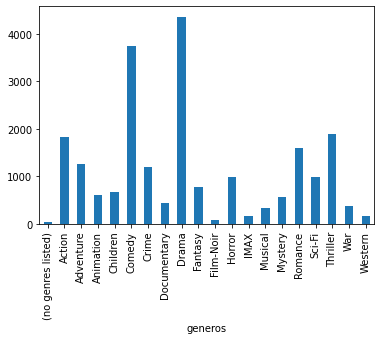

In [163]:
generos_totais_count.plot(kind="bar")